# Prediction

In [20]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay


from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

## Framework
1. Model
2. Fit
3. Predict

In [21]:
# data
fashionBIG = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionBIG.csv")
fashionBIG.head()

,age,income,months_subbed,upgrade
0,22,55.89,14,0
1,32,86.03,57,0
2,38,49.22,37,1
3,14,92.71,51,1
4,33,94.06,37,0


In [4]:
predictors = ["age", "income", "months_subbed"]

X = fashionBIG[predictors]
y = fashionBIG["upgrade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

zscore = StandardScaler()

zscore.fit(X_train)
X_train[predictors] = zscore.transform(X_train)
X_test[predictors] = zscore.transform(X_test)

In [22]:
myLogit = LogisticRegression(penalty = "none") #create

In [23]:
myLogit.fit(X_train,y_train) #fit

LogisticRegression(penalty='none')

In [25]:
predictedVals = myLogit.predict(X_test) #predict
predictedProbs = myLogit.predict_proba(X_test)

In [26]:
print("Accuracy: ", accuracy_score(y_test, predictedVals))
print("F1 Score: ", f1_score(y_test, predictedVals))
print("Recall: ", recall_score(y_test, predictedVals))
print("Precision: ", precision_score(y_test, predictedVals))

Accuracy:  0.58
F1 Score:  0.6911764705882354
Recall:  0.8392857142857143
Precision:  0.5875


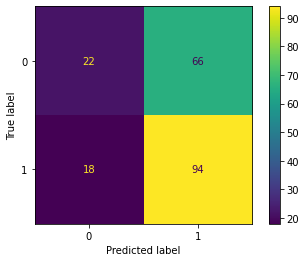

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,predictedVals)

## LR Coef interpretation


In [28]:
coef = pd.DataFrame({"Coefs": myLogit.coef_[0],
                    "Names": predictors})
coef = coef.append({"Coefs": myLogit.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)

In [31]:
coef["Odds Coef"] = np.exp(coef["Coefs"])
coef

,Coefs,Names,Odds Coef
0,0.442305,age,1.556290
1,0.011997,income,1.012069
2,0.024809,months_subbed,1.025119
3,0.353898,intercept,1.424610


## LR different thresholds


In [32]:
fashionNEW = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionNEW.csv")
Xnew = fashionNEW[predictors]
Xnew[predictors] = zscore.transform(Xnew)

In [38]:
# predict proba
y_pred_prob = myLogit.predict_proba(Xnew)
y_pred_prob = y_pred_prob[:,1]

In [50]:
thresh = 0.3

y_pred_prob_thresh = (y_pred_prob > thresh) * 1

In [51]:
# accuracy score
accuracy_score(fashionNEW["upgrade"], y_pred_prob_thresh)

0.604

## Regularization

In [52]:
# Default Regularization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#create
myLogit = LogisticRegression()
myLogit.fit(X_train, y_train)
#fit
print(myLogit.coef_)
print(myLogit.intercept_)

[[0.43969542 0.01201809 0.02465897]]
[0.35372142]


In [53]:
#create
myLogit2 = LogisticRegression(penalty = "none")

#fit
myLogit2.fit(X_train, y_train)

print(myLogit2.coef_)
print(myLogit2.intercept_)

[[0.44230458 0.01199651 0.02480876]]
[0.35389815]
